# I. make a model

to activate bagpipes environment: source bagpipes_env/bin/activate
to remove existing results file: rm pipes/posterior/./697852.h5, rm pipes/posterior/fit_comp/697852.h5


In [1]:
from astropy.io import fits

from astropy.io import fits
hdul = fits.open('COSMOSWeb_mastercatalog_v1.fits')
hdul.info()

Filename: COSMOSWeb_mastercatalog_v1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  PHOTOMETRY HOTCOLD AND SE++    1 BinTableHDU    603   784016R x 287C   [K, K, 3A, K, D, D, D, D, D, D, D, D, D, 4A, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L, L, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, I, D

In [2]:
import bagpipes as pipes
import numpy as np

sfh = {
    "age": 0.8,
    "tau": 0.5,
    "massformed": 8,
    #"metallicity": 0.0435
    "metallicity": 0.00041

}

model_components = {
    "redshift": 3.654,
    "delayed": sfh,
    "dust":{
        "type": "Salim",
        "delta": -0.4,
        "Av": 0.1,          #total dust attenuation in V band, empgs usually dust poor
        "B": 0.0            #UV bump strength, 2175 A feature. B=0, no UV bump; =1 moderate bump; =3 strong bump
    }    
}


Bagpipes: Latex distribution not found, plots may look strange.


KeyboardInterrupt: 

In [ ]:
filter_list = [
    "HST_ACS_HRC.F814W.txt", 
    "JWST_NIRCam.F115W.txt",
    "JWST_NIRCam.F150W.txt",
    "JWST_NIRCam.F277W.txt",
    "JWST_NIRCam.F444W.txt",
    "JWST_MIRI.F770W.txt",
]

#central wl in um: 0.8, 1.15, 1.5, 2.77, 4.44

model = pipes.model_galaxy(model_components, filt_list=filter_list)


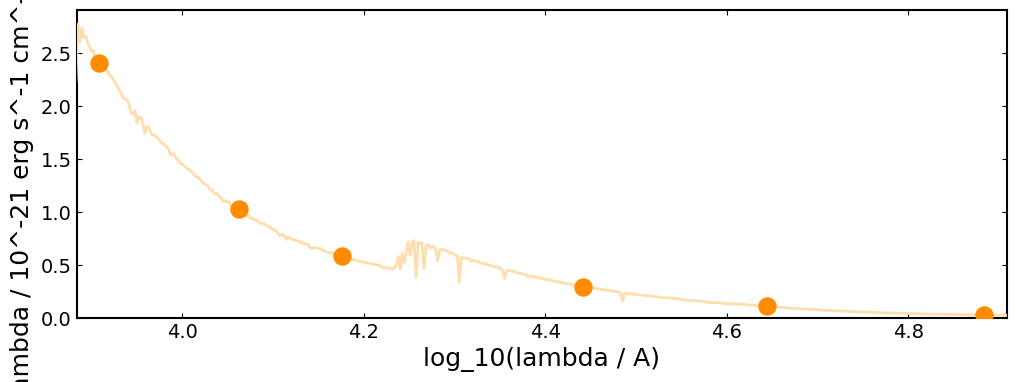

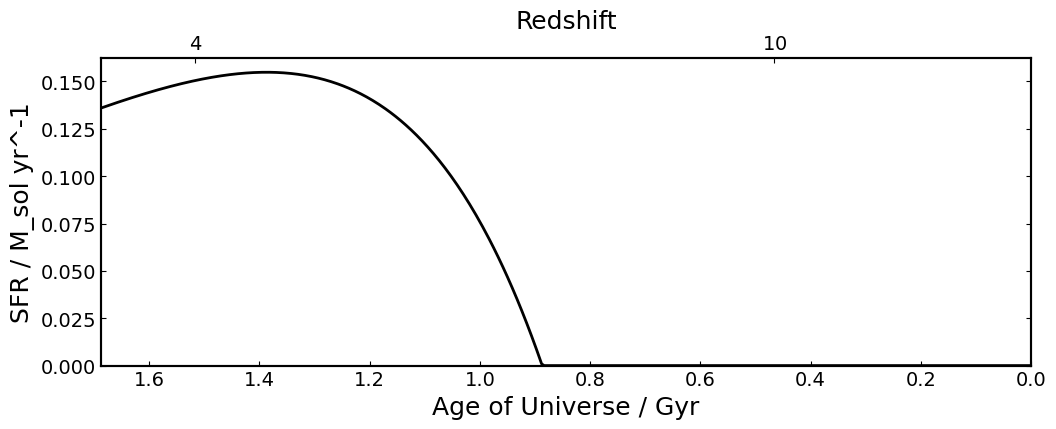

In [ ]:
fig = model.plot()
fig = model.sfh.plot()

# II. Loading observational data

plot photometry

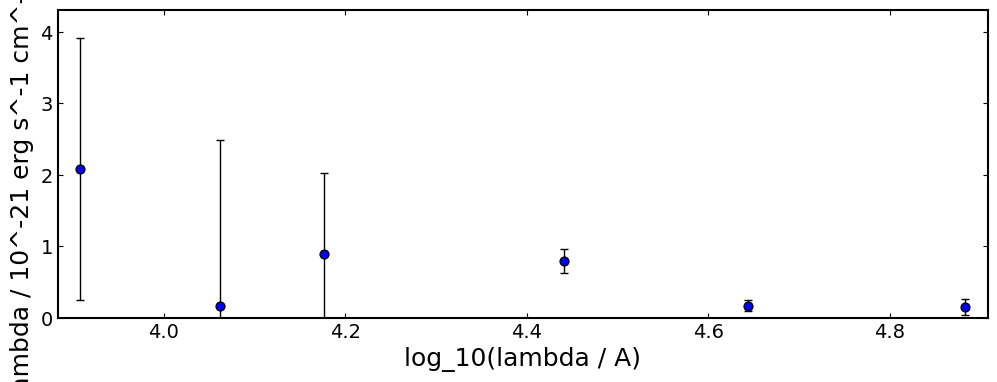

In [ ]:
def load_data(ID):
    fluxes = [0.004562093746258968, 0.0007150931993475961,  0.006683339890967625, 0.020123204673992527, 0.010774252706071118, 0.029826490164723884]
    flux_errs = [0.0040173497212059464, 0.0103046083646901, 0.0085052715368878, 0.004347320300121843, 0.00520581537850825, 0.021917006066845986]
    # [814w, 115w, 150w, 277w, 444w, 770w]

    photometry = np.c_[fluxes, flux_errs]

    # blow up the errors associated with any missing fluxes.
    for i in range(len(photometry)):
        if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
            photometry[i,:] = [0., 9.9*10**99.]
            
    # Enforce a maximum SNR of 20
    for i in range(len(photometry)):

        max_snr=15
        
        if photometry[i, 0]/photometry[i, 1] > max_snr:
            photometry[i, 1] = photometry[i, 0]/max_snr

    return photometry



galaxy = pipes.galaxy("697852", load_data, spectrum_exists=False, filt_list=filter_list)
fig = galaxy.plot()


In [ ]:

import bagpipes as pipes
import numpy as np

sfh = {
    "age": (0.05, 1.5),
    "tau": (0.01, 2),
    "massformed": (5, 12),
    "metallicity": (0.00024, 0.00058)
}


'''
sfh = {
    "age": 0.8,
    "tau": 0.5,
    "massformed": 8,
    #"metallicity": 0.0435
    "metallicity": 0.00041

}
'''

fit_instructions = {
    "redshift": 3.654,
    "delayed": sfh,
    "dust":{
        "type": "Salim",
        "delta": (-1, 0.4),
        "Av": (0, 1),          #total dust attenuation in V band, empgs usually dust poor
        "B": (0, 1)          #UV bump strength, 2175 A feature. B=0, no UV bump; =1 moderate bump; =3 strong bump
    }    
}

fit = pipes.fit(galaxy, fit_instructions)
fit.fit(verbose=False, sampler="nautilus")


Bagpipes: fitting object 697852


Completed in 17.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
delayed:age                    0.428      0.900      1.306
delayed:massformed             8.171      8.405      8.592
delayed:metallicity            0.000      0.000      0.001
delayed:tau                    0.396      1.001      1.669
dust:Av                        0.214      0.455      0.782
dust:B                         0.169      0.523      0.824
dust:delta                    -0.802     -0.402      0.101




# III. fitting and posteriors

8.22368455252232


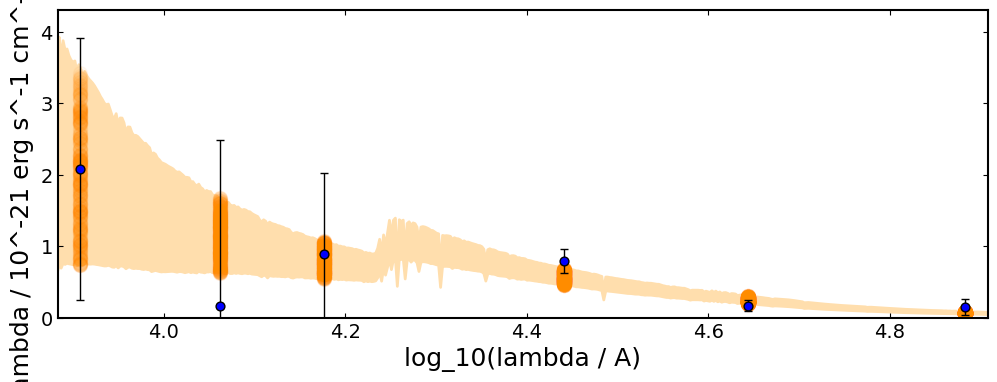

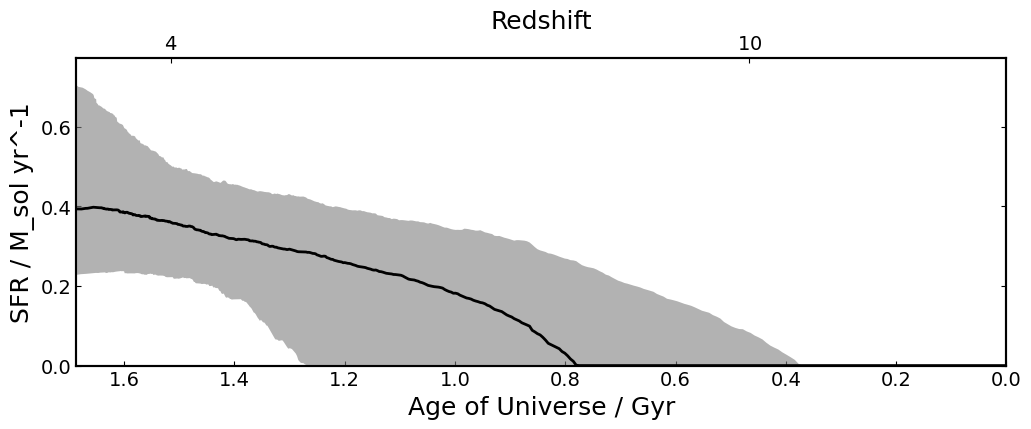

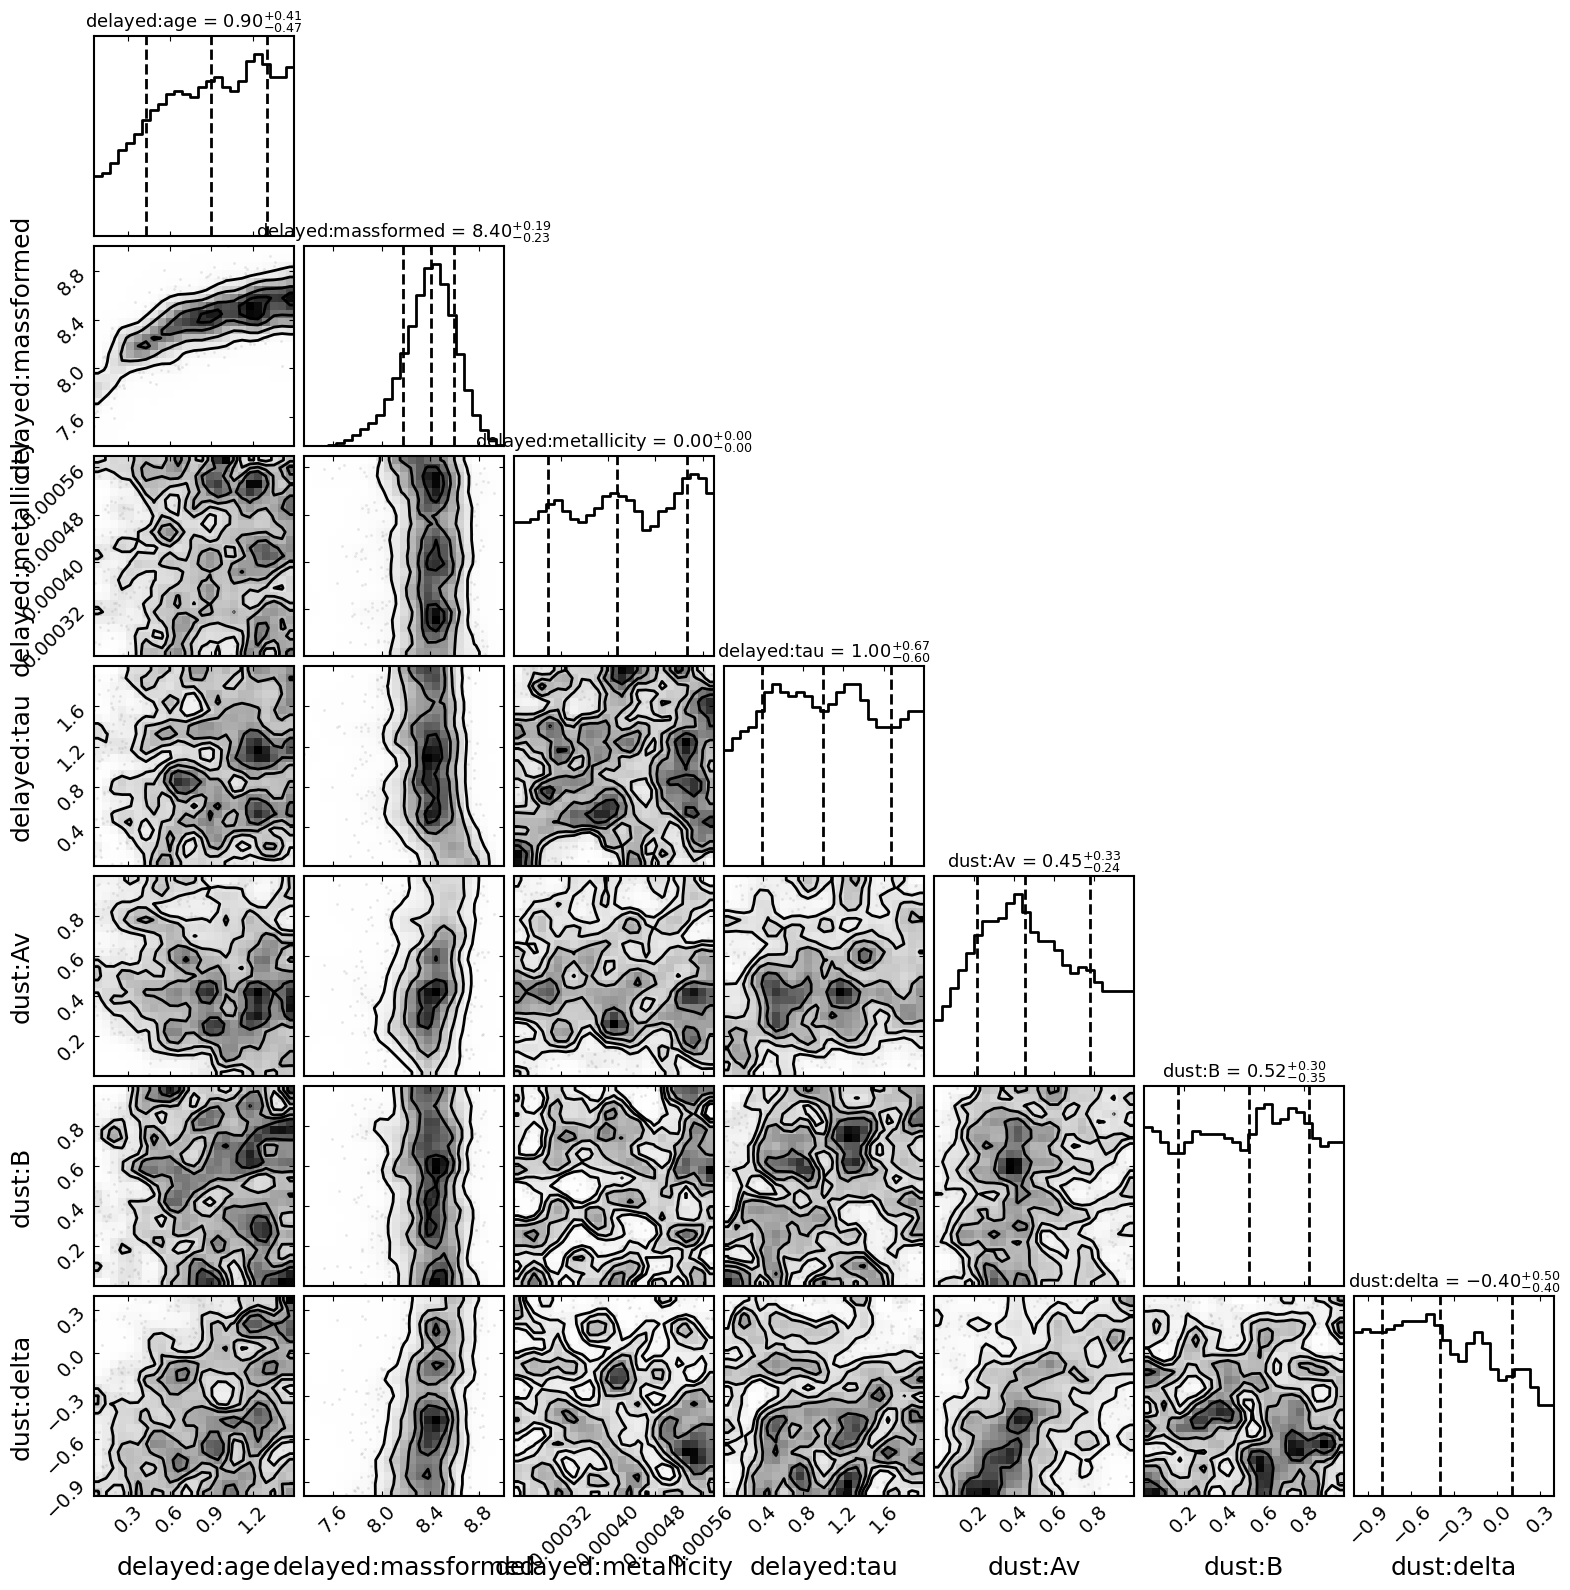

In [ ]:
print(np.median(fit.posterior.samples["stellar_mass"]))


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

fig = fit.plot_spectrum_posterior(save=False, show=True)
fig = fit.plot_sfh_posterior(save=False, show=True)
fig = fit.plot_corner(save=False, show=True)

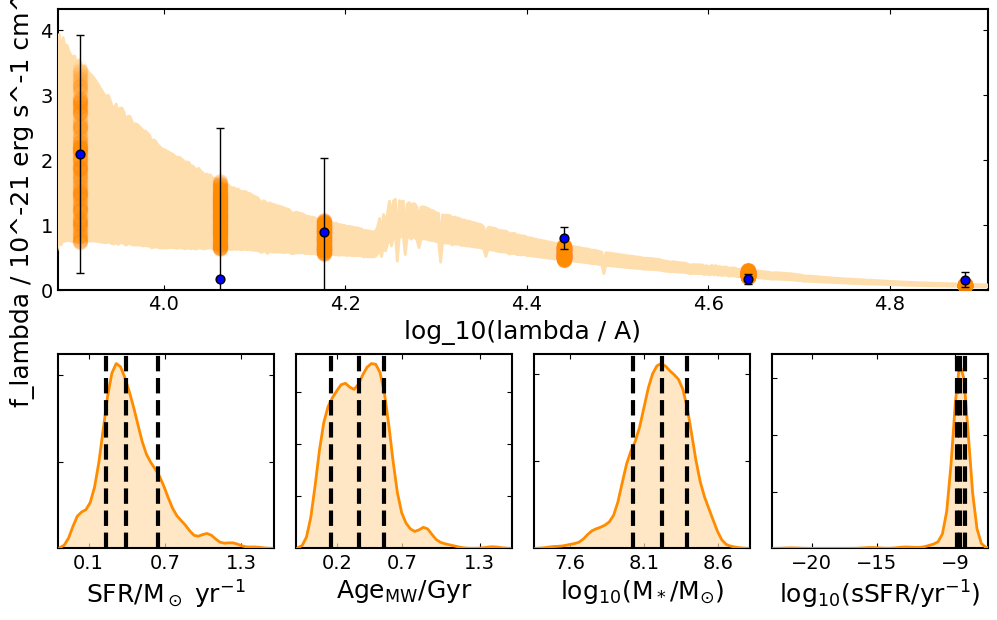

In [ ]:
plt.close()

fig = plt.figure(figsize=(12, 7))
gs = mpl.gridspec.GridSpec(7, 4, hspace=3., wspace=0.1)

ax1 = plt.subplot(gs[:4, :])

pipes.plotting.add_observed_photometry(fit.galaxy, ax1, zorder=10)
pipes.plotting.add_photometry_posterior(fit, ax1)

labels = ["sfr", "mass_weighted_age", "stellar_mass", "ssfr"]

post_quantities = dict(zip(labels, [fit.posterior.samples[l] for l in labels]))

axes = []
for i in range(4):
    axes.append(plt.subplot(gs[4:, i]))
    pipes.plotting.hist1d(post_quantities[labels[i]], axes[-1], smooth=True, label=labels[i])

plt.show()

# add complexity


Bagpipes: fitting object 697852

Mean likelihood call time: 0.0015
Wall time per lnlike call: 0.0021
Mean likelihood call time: 0.001
Wall time per lnlike call: 0.0029
Mean likelihood call time: 0.0009
Wall time per lnlike call: 0.0033
Mean likelihood call time: 0.0008
Wall time per lnlike call: 0.0037
Mean likelihood call time: 0.0009
Wall time per lnlike call: 0.0027
Mean likelihood call time: 0.0009
Wall time per lnlike call: 0.0039
Mean likelihood call time: 0.0009
Wall time per lnlike call: 0.0032

Completed in 22.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
delayed:age                    0.170      0.624      1.204
delayed:massformed             7.912      8.268      8.553
delayed:metallicity            0.013      0.021      0.027
delayed:tau                    0.261      0.606      0.870
dust:Av                        0.258      0.659    

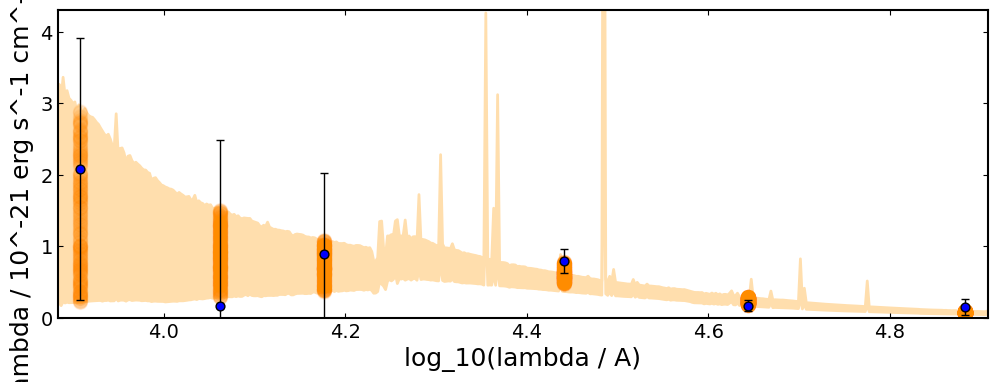

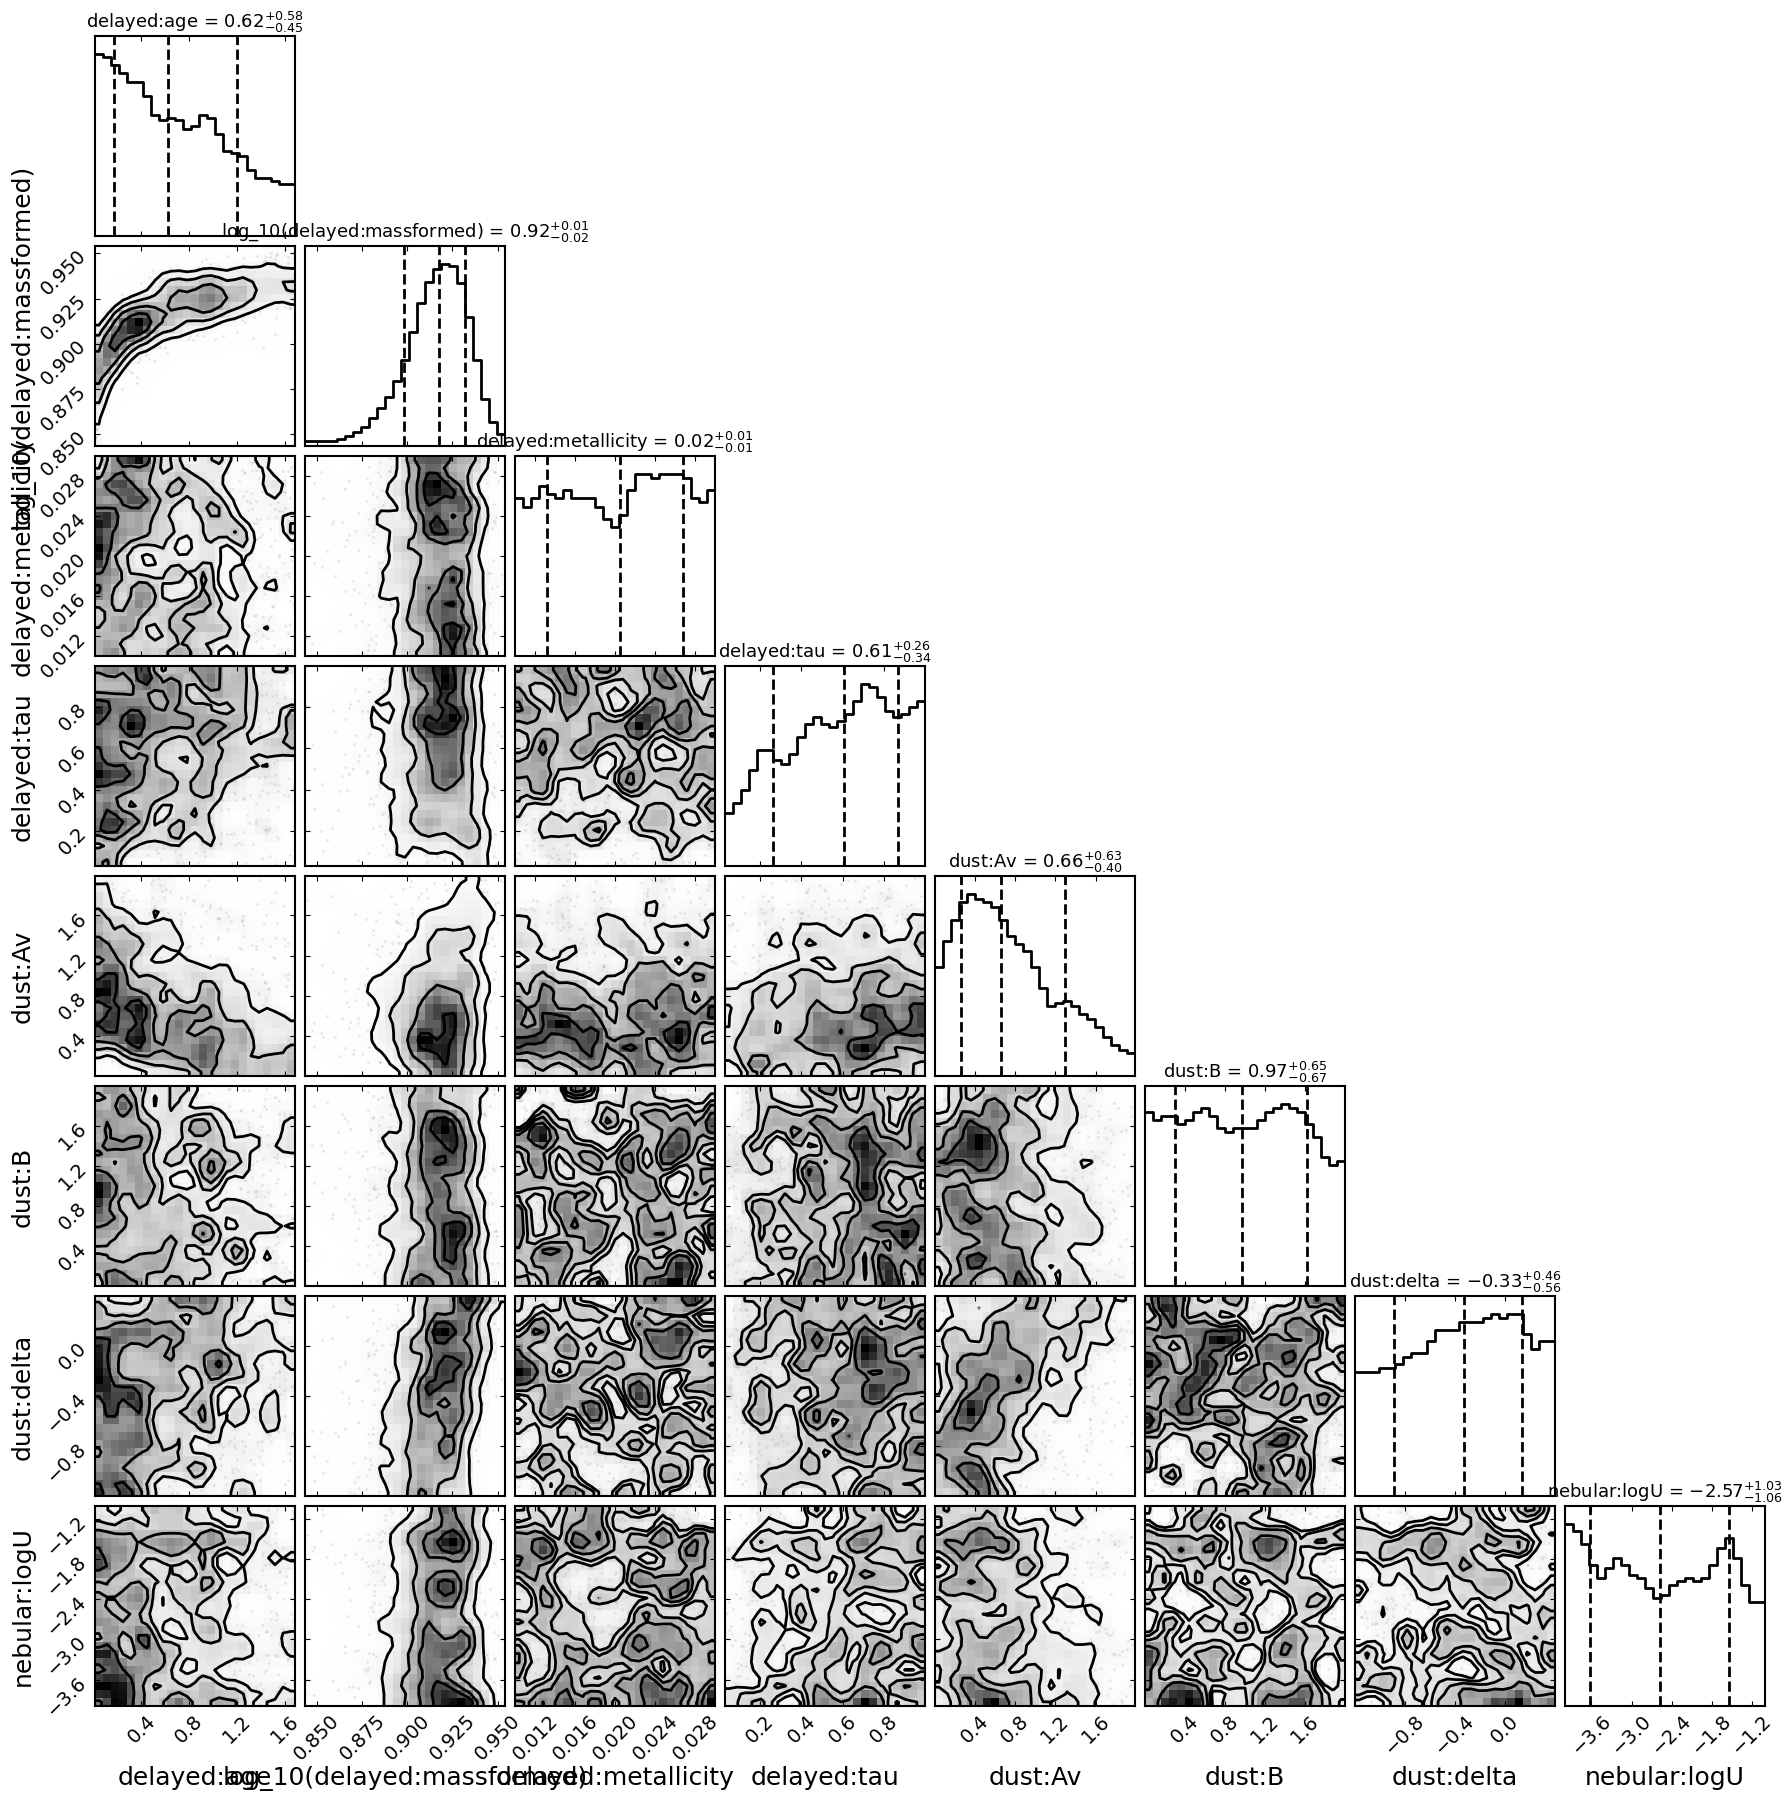

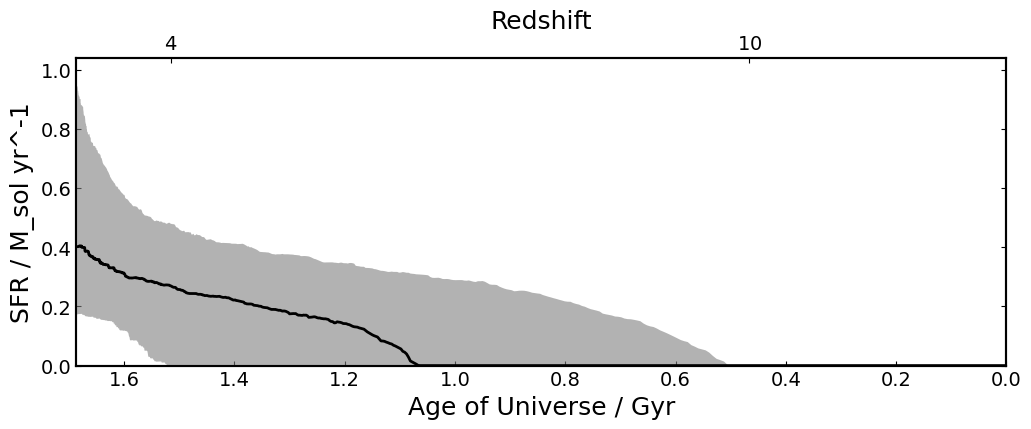

In [ ]:
delayed_tau = {
    "age": (0.01, 1.86),
    "tau": (0.03, 1.0),
    "massformed": (5.0, 12.0),
    "massformed_prior": "log_10",
    "metallicity": (0.01, 0.03),
    "metallicity_prior": "uniform",
}

dust = {
    "type": "Salim",
    "Av": (0.0, 2.0),
    #"delta": (-0.6, 0.4), make a little bit negative-->smc like
    #"delta": (-0.25, 0.1),
    "delta": (-1.2, 0.4),
    "B": (0.0, 2)
}


nebular = {
    "logU": (-4, -1),
    #"f_esc": (0.0, 0.5),
    #eta???
}

fit_dict_complex = {
    "redshift": 3.654,          # or (3.5, 3.8) if you intend to fit it
    "delayed": delayed_tau,
    "dust": dust,
    "nebular": nebular,
}


fit = pipes.fit(galaxy, fit_dict_complex, run="fit_comp", time_calls=True)
fit.fit(verbose=False, sampler="nautilus")
fig = fit.plot_spectrum_posterior(save=False, show=True)
fig = fit.plot_corner(save=False, show=True)
fig = fit.plot_sfh_posterior(save=False, show=True)



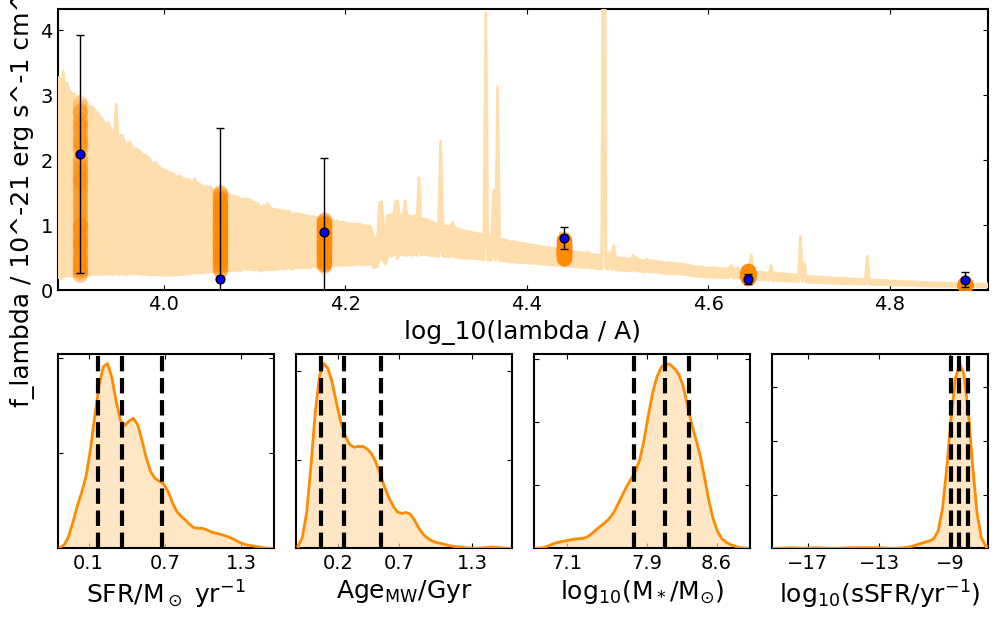

In [ ]:
import matplotlib.pyplot as plt
import bagpipes as pipes
import matplotlib as mpl
%matplotlib inline


plt.close()

fig = plt.figure(figsize=(12, 7))
gs = mpl.gridspec.GridSpec(7, 4, hspace=3., wspace=0.1)

ax1 = plt.subplot(gs[:4, :])

pipes.plotting.add_observed_photometry(fit.galaxy, ax1, zorder=10)
pipes.plotting.add_photometry_posterior(fit, ax1)

labels = ["sfr", "mass_weighted_age", "stellar_mass", "ssfr"]

post_quantities = dict(zip(labels, [fit.posterior.samples[l] for l in labels]))


fit.posterior.get_advanced_quantities()


axes = []
for i in range(4):
    axes.append(plt.subplot(gs[4:, i]))
    pipes.plotting.hist1d(post_quantities[labels[i]], axes[-1], smooth=True, label=labels[i])

plt.show()

In [ ]:
fit.posterior.get_advanced_quantities()
list(fit.posterior.samples)

chi2_samples = fit.posterior.samples['chisq_phot']
photometry = fit.posterior.samples['photometry']

print(photometry)

#chi2: median and 68% interval
chi2_median = np.median(chi2_samples)
chi2_16, chi2_84 = np.percentile(chi2_samples, [16, 84]) 

#best fit chi2
idx_best = np.argmin(chi2_samples)
chi2_min = chi2_samples[idx_best]

fluxes = [0.004562093746258968, 0.0007150931993475961,  0.006683339890967625, 0.020123204673992527, 0.010774252706071118, 0.029826490164723884]
flux_errs = [0.0040173497212059464, 0.0103046083646901, 0.0085052715368878, 0.004347320300121843, 0.00520581537850825, 0.021917006066845986]

#d,m,s = fluxes, 

print(
    'chi2 \n', 
    'median:', chi2_median, '\n', 
    '16, 84th percentile:', chi2_16, chi2_84, '\n',
    'min/best-fit:', chi2_min
)

[[1.93787905e-23 9.18565667e-23 2.35763555e-22 5.69085276e-22
  2.49751746e-22 7.86368680e-23]
 [1.27329595e-21 5.95130801e-22 3.95047962e-22 2.84967124e-22
  1.16885071e-22 3.63299909e-23]
 [2.35037649e-21 1.11892412e-21 7.55069490e-22 5.12681345e-22
  1.99991109e-22 6.25819928e-23]
 [4.70635270e-21 2.23276926e-21 1.37557955e-21 6.63182807e-22
  1.95386705e-22 4.84954278e-23]
 [2.57879438e-21 1.37945747e-21 8.66094149e-22 4.05970951e-22
  1.14002315e-22 2.86151715e-23]
 [2.73153684e-21 1.51570583e-21 1.29373392e-21 9.50752364e-22
  3.09613032e-22 1.14104797e-22]
 [4.15857262e-21 2.03472296e-21 1.28221282e-21 7.05829734e-22
  2.24977566e-22 6.10052434e-23]
 [3.21704453e-22 3.16356240e-22 4.18404378e-22 6.43931265e-22
  3.27972223e-22 1.15673881e-22]
 [6.38489426e-22 3.96783878e-22 3.24058012e-22 2.99016207e-22
  1.27153877e-22 3.57915852e-23]
 [4.86362044e-22 3.69248552e-22 4.12123366e-22 6.14056652e-22
  3.39873221e-22 1.15051496e-22]
 [3.50670644e-22 2.78137723e-22 3.08483672e-22 4.4

<class 'numpy.ndarray'> 1016
[ 0.03152822  7.56803143  0.01706649  0.93434693  1.30838257  0.86498597
 -0.07521206 -3.20685527]
{'redshift': 3.654, 'delayed': {'age': np.float64(0.03152822226618731), 'tau': np.float64(0.9343469329261331), 'massformed': np.float64(7.568031425635453), 'massformed_prior': 'log_10', 'metallicity': np.float64(0.01706649400894356), 'metallicity_prior': 'uniform'}, 'dust': {'type': 'Salim', 'Av': np.float64(1.308382569664601), 'delta': np.float64(-0.07521205758291383), 'B': np.float64(0.8649859733178149)}, 'nebular': {'logU': np.float64(-3.206855271719938), 'velshift': 0.0}}


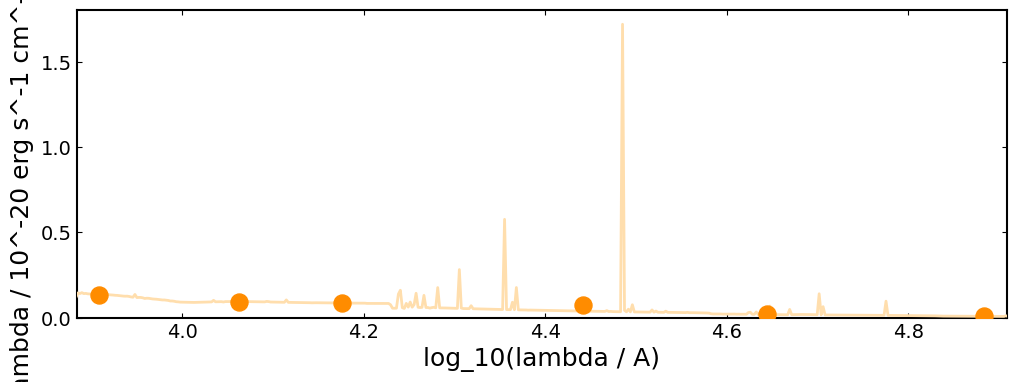

In [ ]:
print(type(fit.results["lnlike"]), len(fit.results["lnlike"]))

max_like_index = np.argmax(fit.results["lnlike"])

#parameter values for each point in posterior
print(fit.results["samples2d"][max_like_index, :])

#generate model_components dict for maximum likelihood model
fit.fitted_model._update_model_components(fit.results["samples2d"][max_like_index, :])

max_like_model_components = fit.fitted_model.model_components                                                                                           

print(max_like_model_components)

max_like_model_galaxy = pipes.model_galaxy(max_like_model_components,
                                           filt_list=filter_list)

fig = max_like_model_galaxy.plot()

{'redshift': 3.654, 'delayed': {'age': np.float64(0.03152822226618731), 'tau': np.float64(0.9343469329261331), 'massformed': np.float64(7.568031425635453), 'massformed_prior': 'log_10', 'metallicity': np.float64(0.01706649400894356), 'metallicity_prior': 'uniform'}, 'dust': {'type': 'Salim', 'Av': np.float64(1.308382569664601), 'delta': np.float64(-0.07521205758291383), 'B': np.float64(0.8649859733178149)}, 'nebular': {'logU': np.float64(-3.206855271719938), 'velshift': 0.0}}


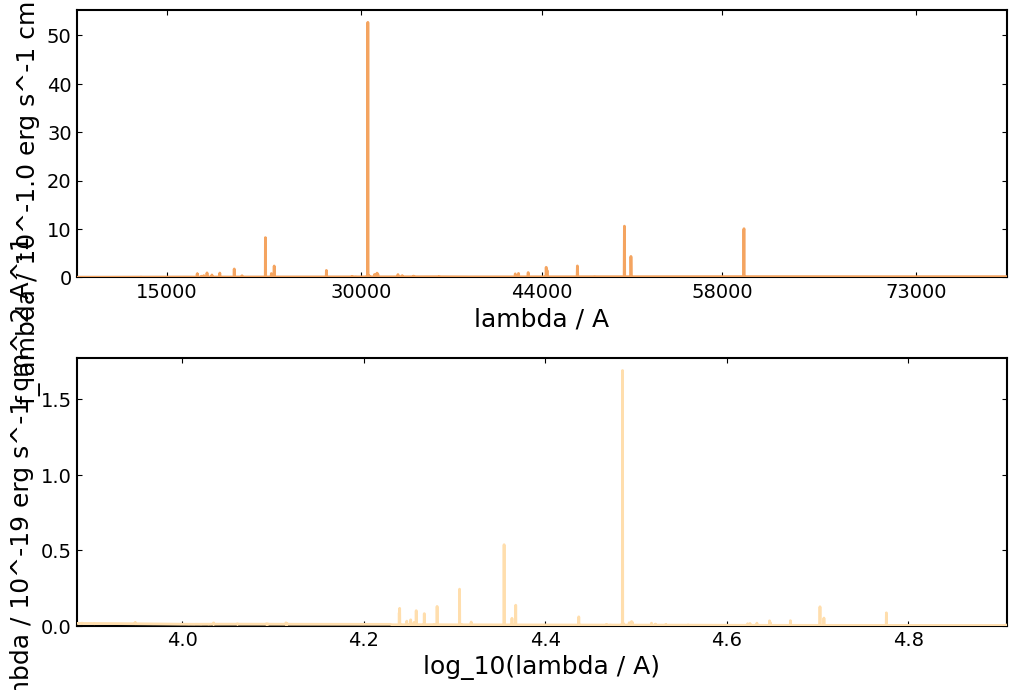

In [ ]:
print(max_like_model_components)

spec_wavs = np.arange(8000., 80000., 10.) 
rebuild_model = pipes.model_galaxy(max_like_model_components, filter_list, spec_wavs=spec_wavs, spec_units='mujy', phot_units='mujy')

fig = rebuild_model.plot()

model_photometry = rebuild_model.photometry


lam_A         = rebuild_model.spectrum[:,0]   # Å
fnu_model_uJy = rebuild_model.spectrum[:,1]   # µJy (continuous SED)
model_phot_uJy = rebuild_model.photometry 

In [ ]:
print(load_data(697852))
print(fluxes)
print(flux_errs)
print(fit.galaxy.photometry)

[[0.00456209 0.00401735]
 [0.00071509 0.01030461]
 [0.00668334 0.00850527]
 [0.0201232  0.00434732]
 [0.01077425 0.00520582]
 [0.02982649 0.02191701]]
[0.004562093746258968, 0.0007150931993475961, 0.006683339890967625, 0.020123204673992527, 0.010774252706071118, 0.029826490164723884]
[0.0040173497212059464, 0.0103046083646901, 0.0085052715368878, 0.004347320300121843, 0.00520581537850825, 0.021917006066845986]
[[8.10043860e+03 2.08431944e-21 1.83543798e-21]
 [1.15426084e+04 1.60905863e-22 2.31867944e-21]
 [1.50074381e+04 8.89605726e-22 1.13211933e-21]
 [2.76173979e+04 7.90949527e-22 1.70872930e-22]
 [4.40432691e+04 1.66511873e-22 8.04538460e-23]
 [7.63933369e+04 1.53217486e-22 1.12586783e-22]]


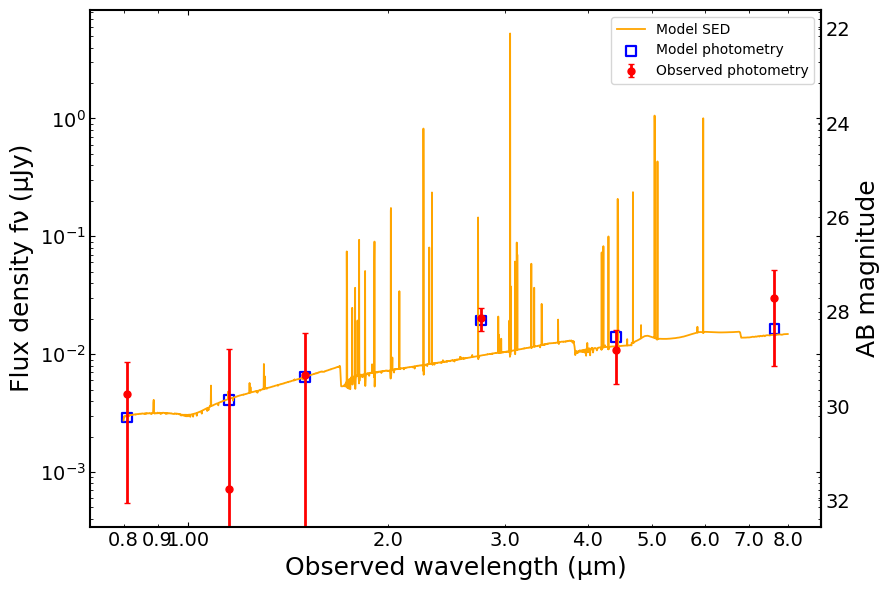

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# built:
# rebuild_model with spec_units="mujy", phot_units="mujy"
# lam_A = rebuild_model.spectrum[:,0]
# fnu_model_uJy = rebuild_model.spectrum[:,1]
# model_phot_uJy = rebuild_model.photometry

# Observed photometry (currently f_lambda in erg/s/cm^2/Å):
#The format of the photometry returned by load_data should be a 2D array with a column of fluxes in microJanskys and a column of flux errors in the same units (can be changed to erg/s/cm^2/A with the phot_units keyword argument). The fluxes should be in the same order as the filters in your filt_list. Bagpipes will calculate effective wavelengths for each filter and store these along with the input data in galaxy.photometry.
#these are input data, 
lam_eff_A = fit.galaxy.photometry[:, 0]        # effective λ [Å]
f_lambda_obs_A = fit.galaxy.photometry[:, 1]   # erg s^-1 cm^-2 Å^-1
f_lambda_err_A = fit.galaxy.photometry[:, 2]   # same units


# Convert observed f_lambda (Å^-1) -> f_nu (µJy)
c = 2.99792458e10                # cm/s

lam_cm = lam_eff_A * 1e-8        # Å -> cm
f_lambda_obs_cm = f_lambda_obs_A * 1e8      # per Å -> per cm
f_lambda_err_cm = f_lambda_err_A * 1e8

f_nu_obs_cgs = (lam_cm**2 / c) * f_lambda_obs_cm
f_nu_err_cgs = (lam_cm**2 / c) * f_lambda_err_cm

f_nu_obs_uJy = f_nu_obs_cgs / 1e-29         # = /1e-23 * 1e6
f_nu_err_uJy = f_nu_err_cgs / 1e-29


# Plot: fν (µJy) vs λ (µm); fitted SED
# (custom model) The output spectrum is stored as model.spectrum which is a two column array, containing wavelengths in Angstroms and spectral fluxes in erg/s/cm^2/A by default. 
lam_um = (rebuild_model.spectrum[:,0]) / 1e4
lam_eff_um = lam_eff_A / 1e4

plt.figure(figsize=(9,6))
plt.plot(lam_um, fnu_model_uJy, color="orange", lw=1.3, label="Model SED")
plt.scatter(lam_eff_um, model_phot_uJy, marker="s", s=50,
            facecolors="none", edgecolors="blue", lw=1.6, label="Model photometry")
plt.errorbar(lam_eff_um, f_nu_obs_uJy, yerr=f_nu_err_uJy, fmt="o", ms=5,
             color="red", ecolor="red", capsize=2, label="Observed photometry")

plt.xscale("log"); plt.yscale("log")

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(ScalarFormatter())

plt.xlabel("Observed wavelength (µm)")
plt.ylabel("Flux density fν (µJy)")

def uJy_to_AB(uJy):
    return 23.9 - 2.5*np.log10(uJy)

def AB_to_uJy(mag):
    return 10**((23.9 - mag)/2.5)

secax = ax.secondary_yaxis('right', functions=(uJy_to_AB, AB_to_uJy))
secax.set_ylabel("AB magnitude")


secax.yaxis.set_major_formatter(ScalarFormatter())
secax.yaxis.set_minor_formatter(ScalarFormatter())

plt.legend()
plt.tight_layout()

import numpy as np

plt.show()


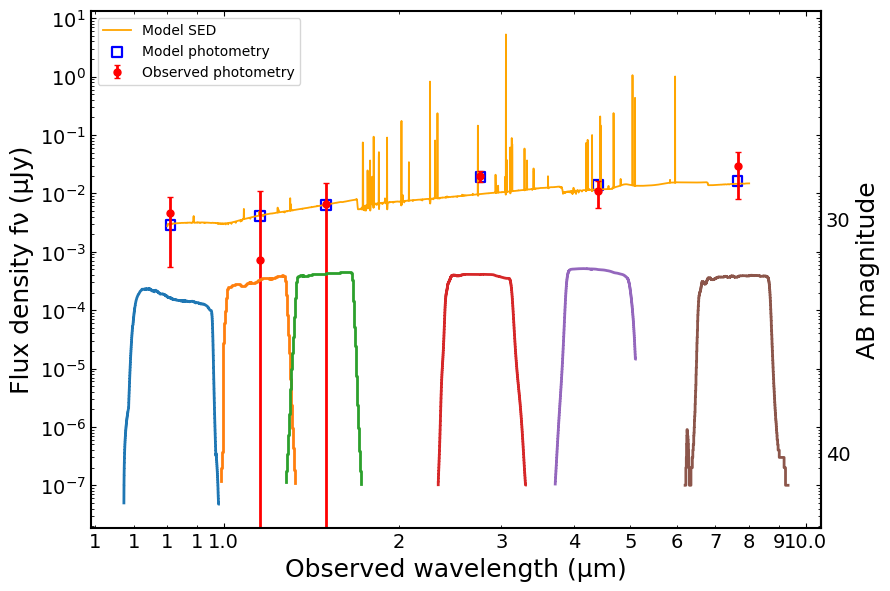

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# built:
# rebuild_model with spec_units="mujy", phot_units="mujy"
# lam_A = rebuild_model.spectrum[:,0]
# fnu_model_uJy = rebuild_model.spectrum[:,1]
# model_phot_uJy = rebuild_model.photometry

# Observed photometry (currently f_lambda in erg/s/cm^2/Å):
#The format of the photometry returned by load_data should be a 2D array with a column of fluxes in microJanskys and a column of flux errors in the same units (can be changed to erg/s/cm^2/A with the phot_units keyword argument). The fluxes should be in the same order as the filters in your filt_list. Bagpipes will calculate effective wavelengths for each filter and store these along with the input data in galaxy.photometry.
#these are input data, 
lam_eff_A = fit.galaxy.photometry[:, 0]        # effective λ [Å]
f_lambda_obs_A = fit.galaxy.photometry[:, 1]   # erg s^-1 cm^-2 Å^-1
f_lambda_err_A = fit.galaxy.photometry[:, 2]   # same units


# Convert observed f_lambda (Å^-1) -> f_nu (µJy)
c = 2.99792458e10                # cm/s

lam_cm = lam_eff_A * 1e-8        # Å -> cm
f_lambda_obs_cm = f_lambda_obs_A * 1e8      # per Å -> per cm
f_lambda_err_cm = f_lambda_err_A * 1e8

f_nu_obs_cgs = (lam_cm**2 / c) * f_lambda_obs_cm
f_nu_err_cgs = (lam_cm**2 / c) * f_lambda_err_cm

f_nu_obs_uJy = f_nu_obs_cgs / 1e-29         # = /1e-23 * 1e6
f_nu_err_uJy = f_nu_err_cgs / 1e-29


# Plot: fν (µJy) vs λ (µm); fitted SED
# (custom model) The output spectrum is stored as model.spectrum which is a two column array, containing wavelengths in Angstroms and spectral fluxes in erg/s/cm^2/A by default. 
lam_um = (rebuild_model.spectrum[:,0]) / 1e4
lam_eff_um = lam_eff_A / 1e4

plt.figure(figsize=(9,6))
plt.plot(lam_um, fnu_model_uJy, color="orange", lw=1.3, label="Model SED")
plt.scatter(lam_eff_um, model_phot_uJy, marker="s", s=50,
            facecolors="none", edgecolors="blue", lw=1.6, label="Model photometry")
plt.errorbar(lam_eff_um, f_nu_obs_uJy, yerr=f_nu_err_uJy, fmt="o", ms=5,
             color="red", ecolor="red", capsize=2, label="Observed photometry")

plt.xscale("log"); plt.yscale("log")

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(ScalarFormatter())

plt.xlabel("Observed wavelength (µm)")
plt.ylabel("Flux density fν (µJy)")

def uJy_to_AB(uJy):
    return 23.9 - 2.5*np.log10(uJy)

def AB_to_uJy(mag):
    return 10**((23.9 - mag)/2.5)

secax = ax.secondary_yaxis('right', functions=(uJy_to_AB, AB_to_uJy))
secax.set_ylabel("AB magnitude")


secax.yaxis.set_major_formatter(ScalarFormatter())
secax.yaxis.set_minor_formatter(ScalarFormatter())

plt.legend()
plt.tight_layout()

import numpy as np

data_F814 = np.loadtxt("HST_ACS_HRC.F814W.txt", comments="#")
data_F115 = np.loadtxt("JWST_NIRCam.F115W.txt", comments="#")
data_F150 = np.loadtxt("JWST_NIRCam.F150W.txt", comments="#")
data_F277 = np.loadtxt("JWST_NIRCam.F277W.txt", comments="#")
data_F444 = np.loadtxt("JWST_NIRCam.F444W.txt", comments="#")
data_F770 = np.loadtxt("JWST_MIRI.F770W.txt", comments="#")

wl_F814 = data_F814[:,0]/10000
wl_F115 = data_F115[:,0]/10000
wl_F150 = data_F150[:,0]/10000
wl_F277 = data_F277[:,0]/10000
wl_F444 = data_F444[:,0]/10000
wl_F770 = data_F770[:,0]/10000

tr_F814 = data_F814[:,1]
tr_F115 = data_F115[:,1]
tr_F150 = data_F150[:,1]
tr_F277 = data_F277[:,1]
tr_F444 = data_F444[:,1]
tr_F770 = data_F770[:,1]

plt.step(wl_F814, tr_F814*1e-3)
plt.step(wl_F115, tr_F115*1e-3)
plt.step(wl_F150, tr_F150*1e-3)
plt.step(wl_F277, tr_F277*1e-3)
plt.step(wl_F444, tr_F444*1e-3)
plt.step(wl_F770, tr_F770*1e-3)

plt.show()


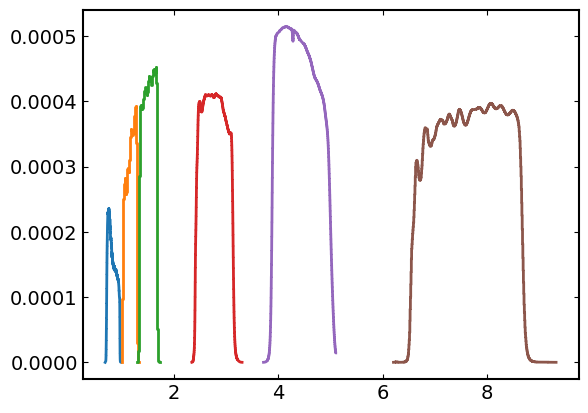

In [ ]:
'''import numpy as np

data_F814 = np.loadtxt("HST_ACS_HRC.F814W.txt", comments="#")
data_F115 = np.loadtxt("JWST_NIRCam.F115W.txt", comments="#")
data_F150 = np.loadtxt("JWST_NIRCam.F150W.txt", comments="#")
data_F277 = np.loadtxt("JWST_NIRCam.F277W.txt", comments="#")
data_F444 = np.loadtxt("JWST_NIRCam.F444W.txt", comments="#")
data_F770 = np.loadtxt("JWST_MIRI.F770W.txt", comments="#")

wl_F814 = data_F814[:,0]/10000
wl_F115 = data_F115[:,0]/10000
wl_F150 = data_F150[:,0]/10000
wl_F277 = data_F277[:,0]/10000
wl_F444 = data_F444[:,0]/10000
wl_F770 = data_F770[:,0]/10000

tr_F814 = data_F814[:,1]
tr_F115 = data_F115[:,1]
tr_F150 = data_F150[:,1]
tr_F277 = data_F277[:,1]
tr_F444 = data_F444[:,1]
tr_F770 = data_F770[:,1]


plt.step(wl_F814, tr_F814*1e-3)
plt.step(wl_F115, tr_F115*1e-3)
plt.step(wl_F150, tr_F150*1e-3)
plt.step(wl_F277, tr_F277*1e-3)
plt.step(wl_F444, tr_F444*1e-3)
plt.step(wl_F770, tr_F770*1e-3)
'''